# Blood Pressure

Does blood pressure increase with age?

The `blood-pressure-usa.csv` file contains systolic blood pressure readings from 100 individuals sampled by the National Health and Nutrition Examination Survey (NHANES) in the U.S., with each person measured three times.

The `blood-pressure-yanomami.csv` file features systolic blood pressure data from 71 individuals of the Yanomami Tribe, who live in near-total isolation in the Amazon.

While the average American consumes about 3,500 mg of sodium daily (from salt), the Yanomami's intake is estimated to be less than 100 mg.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blood-pressure-usa.csv', 'blood-pressure-yanomami.csv', and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('blood-pressure-usa.csv')
df.head()

,age,bp1,bp2,bp3
0,46,122,129,122
1,43,113,116,111
2,29,102,107,105
3,12,100,102,102
4,9,112,138,94


In [3]:
df_remote = pd.read_csv('blood-pressure-yanomami.csv')
df_remote.head()

,age,bp
0,34,99
1,2,79
2,40,97
3,2,101
4,16,107


### Project Ideas

- Calculate the average blood pressure for each participant in the US dataset.

- Create a linear model for both the US and Yanomami datasets that predicts `bp` from `age`	. 

- Compare the best-fit lines and goodness of fit. What conclusions can you draw?

#### Confounding Variables

The Yanomami people participated in the INTERSALT study, which examined 10,000 individiuals across 52 populations in 32 countries, examining the link between salt consumption and systolic blood pressure. 

Does our data prove that salt intake causes the blood pressure differences between the US and Yanomami populations? What other confounding factors might exist?

In [4]:
# YOUR CODE HERE (add additional cells as needed)

# Linear model API

# linear = LinearModel()
# linear.fit(x, y)
# linear.predict(x)
# linear.plot_model(x_min, x_max, color="black")
# linear.print_model_info(self):

In [10]:
# Calculate average blood pressure per participant
df["avg_bp"] = df[["bp1", "bp2", "bp3"]].mean(axis=1)

print(df)

    age  bp1  bp2  bp3      avg_bp
0    46  122  129  122  124.333333
1    43  113  116  111  113.333333
2    29  102  107  105  104.666667
3    12  100  102  102  101.333333
4     9  112  138   94  114.666667
..  ...  ...  ...  ...         ...
95   44  103  106  107  105.333333
96    8   88   82   80   83.333333
97   17  103  100  106  103.000000
98   19  121  125  119  121.666667
99   16  130  127  125  127.333333

[100 rows x 5 columns]


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare US data
X_usa = df[["age"]]
y_usa = df["avg_bp"]

# Fit US model
model_usa = LinearRegression().fit(X_usa, y_usa)

# Load Yanomami data
df_remote = pd.read_csv("blood-pressure-yanomami.csv")
X_yano = df_remote[["age"]]
y_yano = df_remote["bp"]

# Fit Yanomami model
model_yano = LinearRegression().fit(X_yano, y_yano)


In [9]:
r2_usa = model_usa.score(X_usa, y_usa)
r2_yano = model_yano.score(X_yano, y_yano)

print("US Model:    BP = {:.2f} + {:.2f}*age (R² = {:.2f})".format(
    model_usa.intercept_, model_usa.coef_[0], r2_usa))
print("Yanomami Model: BP = {:.2f} + {:.2f}*age (R² = {:.2f})".format(
    model_yano.intercept_, model_yano.coef_[0], r2_yano))

US Model:    BP = 93.37 + 0.74*age (R² = 0.47)
Yanomami Model: BP = 95.47 + -0.00*age (R² = 0.00)


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


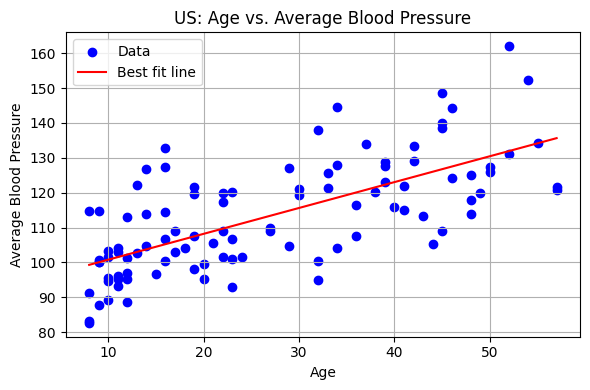

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load US dataset
df_usa = pd.read_csv("blood-pressure-usa.csv")

# Calculate average BP
df_usa["avg_bp"] = df_usa[["bp1", "bp2", "bp3"]].mean(axis=1)

# Prepare data for regression
X = df_usa[["age"]]
y = df_usa["avg_bp"]

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Create prediction line
x_vals = np.linspace(df_usa["age"].min(), df_usa["age"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_vals)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(df_usa["age"], df_usa["avg_bp"], label="Data", color="blue")
plt.plot(x_vals, y_pred, color="red", label="Best fit line")
plt.xlabel("Age")
plt.ylabel("Average Blood Pressure")
plt.title("US: Age vs. Average Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


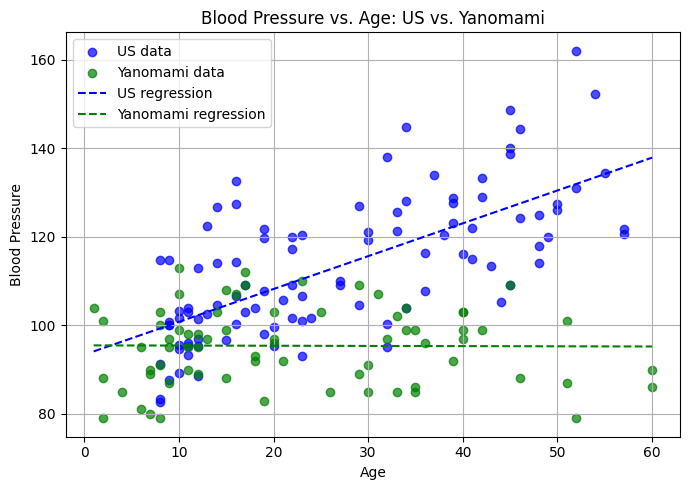

US model: slope = 0.7414760958354747 | intercept = 93.36952968206755
Yanomami model: slope = -0.004198440057105069 | intercept = 95.47465789198789


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load US data
df_us = pd.read_csv("blood-pressure-usa.csv")
df_us["avg_bp"] = df_us[["bp1", "bp2", "bp3"]].mean(axis=1)

# Load Yanomami data
df_yan = pd.read_csv("blood-pressure-yanomami.csv")

# Fit model for US
X_us = df_us[["age"]]
y_us = df_us["avg_bp"]
model_us = LinearRegression()
model_us.fit(X_us, y_us)

# Fit model for Yanomami
X_yan = df_yan[["age"]]
y_yan = df_yan["bp"]
model_yan = LinearRegression()
model_yan.fit(X_yan, y_yan)

# Predict line
x_range = np.linspace(min(df_us["age"].min(), df_yan["age"].min()),
                      max(df_us["age"].max(), df_yan["age"].max()), 100).reshape(-1, 1)
y_pred_us = model_us.predict(x_range)
y_pred_yan = model_yan.predict(x_range)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(df_us["age"], df_us["avg_bp"], label="US data", alpha=0.7, color="blue")
plt.scatter(df_yan["age"], df_yan["bp"], label="Yanomami data", alpha=0.7, color="green")
plt.plot(x_range, y_pred_us, color="blue", linestyle="--", label="US regression")
plt.plot(x_range, y_pred_yan, color="green", linestyle="--", label="Yanomami regression")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("Blood Pressure vs. Age: US vs. Yanomami")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print slopes for comparison
print("US model: slope =", model_us.coef_[0], "| intercept =", model_us.intercept_)
print("Yanomami model: slope =", model_yan.coef_[0], "| intercept =", model_yan.intercept_)
